## Single evaluate

In [7]:
exp_name = "singleBaseline"
if not os.path.exists(os.path.join("exp", exp_name)):
    os.makedirs(os.path.join("exp", exp_name)) 
exp_name = os.path.join(os.path.join("exp", exp_name), exp_name)

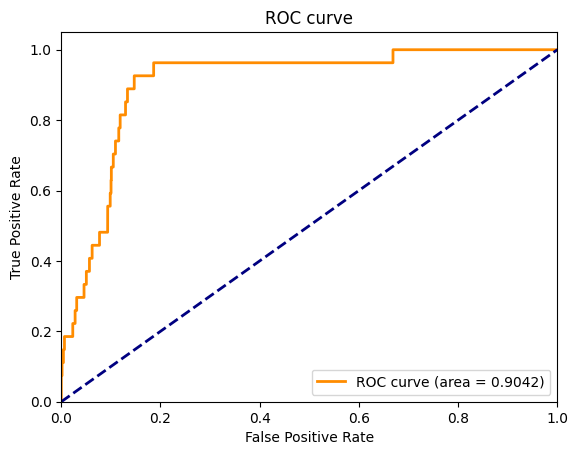

In [8]:

def output(exp_name):
    x_score = []
    GT = [] 

    with open(exp_name + '.txt', "r") as f:
        tmp = f.readline()
        
        while tmp: 
            x = tmp.split(' ')
            x_score.append(float(x[0])) 
            GT.append(int(x[1][:-1]))
            tmp = f.readline()

    #------ 指标部分计算
    from sklearn.metrics import roc_curve, auc
    FPR, TPR, thresholds = roc_curve(GT, x_score)  

    from sklearn.metrics import roc_auc_score
    AUC = roc_auc_score(GT, x_score)

    with open(exp_name + '_result.txt', 'w') as f: 
        f.write("AUC:\n")  
        f.write(str(AUC))  
        f.write('\n')  
        f.write("\nFPR\n")  
        f.write(str(FPR)) 
        f.write("\nTPR\n")  
        f.write(str(TPR)) 
        f.write("\nthresholds\n")  
        f.write(str(thresholds)) 

    import matplotlib.pyplot as plt
    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color='darkorange',
            lw=lw, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.savefig(exp_name + "_ROC.png")
    # plt.show()
output(exp_name)

## CL evaluate